In [277]:
import pandas as pd
import pickle
import numpy as np

In [278]:
datadir = "gamedata/202312110230/"

with open(datadir + "map_team0.pickle", mode="rb") as f:
    team0map = pickle.load(f)

with open(datadir + "map_team1.pickle", mode="rb") as f:
    team1map = pickle.load(f)

with open(datadir + "shot_team0.pickle", mode="rb") as f:
    team0shot = pickle.load(f)

In [279]:
len(team0shot)

[{'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 'y': 2.4, 'rotation': 1},
 {'x': 0.0, 

In [280]:
idx = 0

In [281]:
team0map[idx]

,end,team,shot,angle,x,y
0,0,team0,0,None,None,None
1,0,team0,0,None,None,None
2,0,team0,0,None,None,None
3,0,team0,0,None,None,None
4,0,team0,0,None,None,None
5,0,team0,0,None,None,None
6,0,team0,0,None,None,None
7,0,team0,0,None,None,None
8,0,team1,0,None,None,None
9,0,team1,0,None,None,None


In [282]:
team1map[idx]

,end,team,shot,angle,x,y
0,0,team0,1,-38.138256,2.176518,38.426842
1,0,team0,1,NaN,NaN,NaN
2,0,team0,1,NaN,NaN,NaN
3,0,team0,1,NaN,NaN,NaN
4,0,team0,1,NaN,NaN,NaN
5,0,team0,1,NaN,NaN,NaN
6,0,team0,1,NaN,NaN,NaN
7,0,team0,1,NaN,NaN,NaN
8,0,team1,1,NaN,NaN,NaN
9,0,team1,1,NaN,NaN,NaN


In [283]:
MAPSIZE_X = 2.4 # 中心から端までの距離の絶対値(m)
MAPSIZE_Y = 43.8 # 投擲地点から上端までの距離の絶対値(m)

In [284]:
N = 50

def matrix(x, y) -> tuple:
    numx = N*(MAPSIZE_X+x)/(2*MAPSIZE_X)
    numy = N*y/MAPSIZE_Y
    return (numx, numy)

In [285]:
map_no = 9

x0s = team0map[map_no]["x"].values
y0s = team0map[map_no]["y"].values
team0 = team0map[map_no]["team"].values

x1s = team1map[map_no]["x"].values
y1s = team1map[map_no]["y"].values
team1 = team1map[map_no]["team"].values

team0map[map_no]

,end,team,shot,angle,x,y
0,1,team0,2,NaN,NaN,NaN
1,1,team0,2,NaN,NaN,NaN
2,1,team0,2,NaN,NaN,NaN
3,1,team0,2,NaN,NaN,NaN
4,1,team0,2,NaN,NaN,NaN
5,1,team0,2,NaN,NaN,NaN
6,1,team0,2,NaN,NaN,NaN
7,1,team0,2,NaN,NaN,NaN
8,1,team1,2,-37.19408,1.951861,38.074051
9,1,team1,2,NaN,NaN,NaN


In [286]:
mat = np.zeros((N, N))
for x, y, team in zip(x0s, y0s, team0map):
    num = matrix(x, y)
    if np.isnan(x):
        pass
    else:
        if team is "team0":
            mat[int(num[0]), int(num[1])] = 100 # stone value
        else:
            mat[int(num[0]), int(num[1])] = 500 # stone value

"""
for x, y in zip(x1s, y1s):
    num = matrix(x, y)
    if np.isnan(x):
        pass
    else:
        mat[int(num[0]), int(num[1])] = 50 # stone value
"""        

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_38817/3436754607.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if team is "team0":


'\nfor x, y in zip(x1s, y1s):\n    num = matrix(x, y)\n    if np.isnan(x):\n        pass\n    else:\n        mat[int(num[0]), int(num[1])] = 50 # stone value\n'

In [287]:
mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

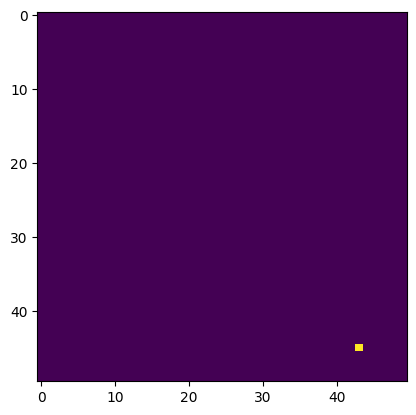

In [288]:
import matplotlib.pyplot as plt

plt.imshow(mat)
plt.show()